In [1]:
# import IPython.display as display
# from IPython.core.display import HTML 

In [2]:
%matplotlib inline

<img style="float: right;", src='img/cover.jpg'/>

# visualizing discussions on twitter with networkx

* kiran garimella, aalto university
* michael mathioudakis, aalto university




## social media
<img style='float: right; height:300px;' src='img/social_media.jpg'/>
#### users generate digital content
status updates, blog posts, pictures, videos, reviews, ...
#### users interact
comments, likes, ratings, re-posts
#### digital traces
we can observe human interactions at global scale

<img style='float:right; width: 250px' src='img/twitter_logo.png'/>
## twitter

#### microblogging platform
users post short messages, '__tweets__'

#### since 2006, 300m + active users

#### tweets, retweets, replies

show examples of real tweets, retweets, and replies

<img style='float:left; width:250px;' src='img/trump_tweet.png'>
<img style='float:left; width:250px;' src='img/greenwald_tweet.png'>
<img style='float:left; width:250px;' src='img/leme_tweet.png'>

can we learn something from the stucture of people's interactions?

we'll do that by visualizing __graphs__

graphs?

## graphs!

#### what is a graph?

data structure

two types of elements: nodes and edges

__todo__ include an example of a very simple social network

#### what are graphs used for?
represent social connections between people ...

... or represent networks
e.g., road networks, computer networks

graph vs network

## graphs with networkx

* python library
* create, process, visualize graphs
* development started in 2004
* mainly developed in 2014

## building a graph

__todo__ say we want to build earlier example

In [3]:
import networkx as nx

# initialize
graph = nx.Graph()

people = ['jere', 'ella', 'miika', 'anniina', 'mikko']
connections = [('jere', 'ella'), ('ella', 'anniina'), ('ella', 'miika'),
                   ('mikko', 'ella'), ('anniina', 'mikko')]

# add all nodes
for node in people:
    graph.add_node(node)

# add all edges
for node_a, node_b in connections:
    graph.add_edge(node_a, node_b)


## visualizing a graph

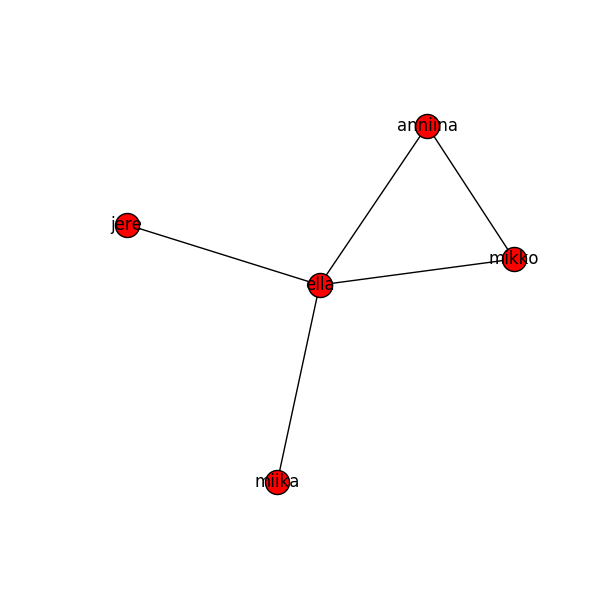

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')

nx.draw_networkx(graph, ax = ax)

fig.savefig('img/friends.pdf', dpi = 300)

## add color to nodes

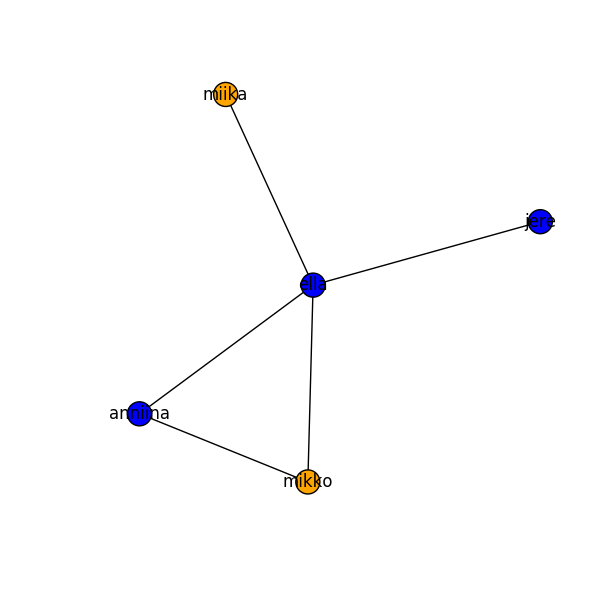

In [5]:
boy_color = 'blue'
girl_color = 'orange'

people = ['jere', 'ella', 'miika', 'anniina', 'mikko']
colors = [boy_color, girl_color, boy_color, girl_color, boy_color]

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off');
nx.draw_networkx(graph, ax = ax, node_color = colors);


## custom labels

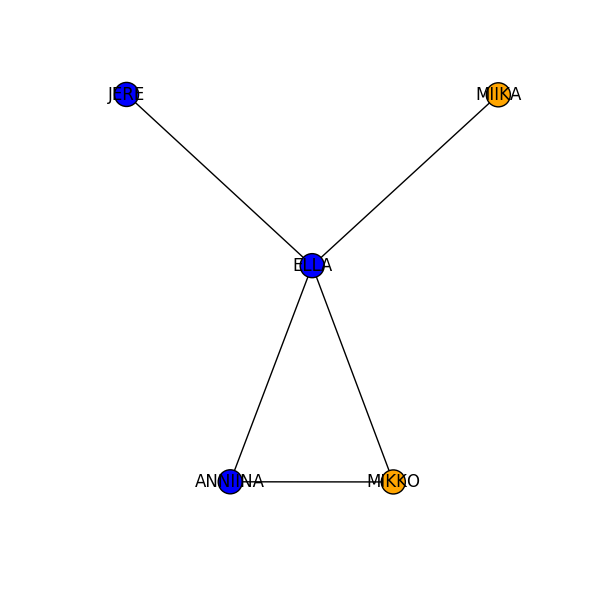

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')

labels = {}
for person in people:
    labels[person] = person.upper()
nx.draw_networkx(graph, labels = labels, ax = ax, node_color = colors);

## fixed node positions

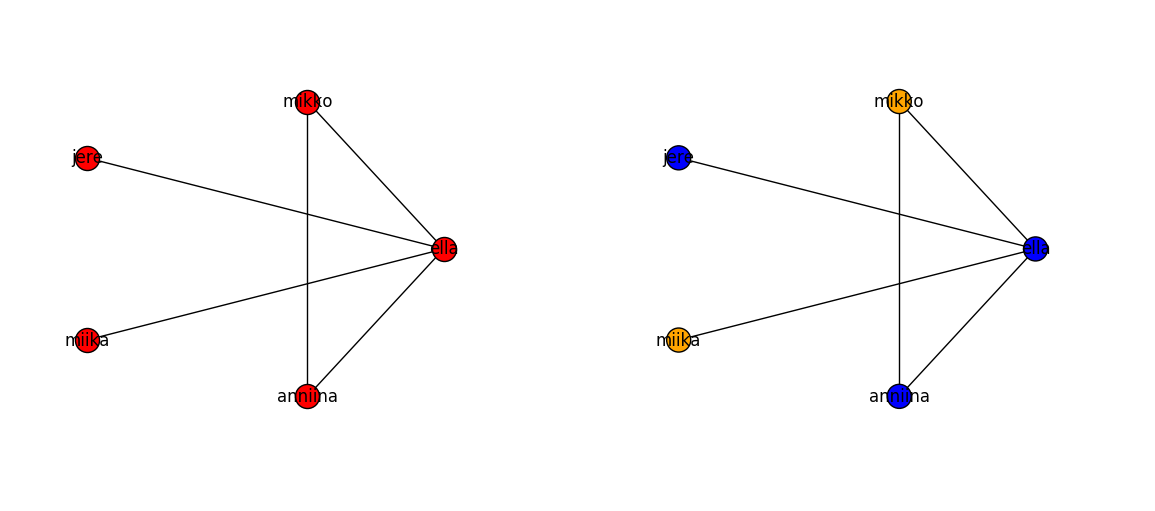

In [7]:
pos = nx.layout.circular_layout(graph)

fig, ax = plt.subplots(1, 2, figsize = (14, 6))
left_plot = ax[0]
right_plot = ax[1]
left_plot.axis('off')
right_plot.axis('off')

nx.draw_networkx(graph, pos = pos, ax = left_plot)
nx.draw_networkx(graph, pos = pos, ax = right_plot, node_color = colors)

## analysis of a graph

### degrees

In [8]:
number_of_friends = graph.degree()

for person in number_of_friends:
    print("{} has {} friends".format(person, number_of_friends[person]))

ella has 4 friends
miika has 1 friends
jere has 1 friends
mikko has 2 friends
anniina has 2 friends


### clustering

__todo__ spectral clustering

# back to twitter

* the twitter data
* retweets and replies

### dataset

In [13]:
{"self":{"_id":"2090e51a-0e30-32c2-acf7-ca3e600bf02b","_context":"1a12388e-4e8c-3d3b-bff4-15489f65f28a","_writer":"0bb21b82-4fb5-3ffd-8e20-cedb0efe73f8","_rev":"a0714e80-1bce-11e3-b773-0800200c9a66","_name":"self"},"raw_tweet":{"_id":"2090e51a-0e30-32c2-acf7-ca3e600bf02b","_context":"1a12388e-4e8c-3d3b-bff4-15489f65f28a","_writer":"0bb21b82-4fb5-3ffd-8e20-cedb0efe73f8","_rev":"a0714e80-1bce-11e3-b773-0800200c9a66","_name":"raw_tweet"},"rtds_tweet":{"_id":"2090e51a-0e30-32c2-acf7-ca3e600bf02b","_context":"1a12388e-4e8c-3d3b-bff4-15489f65f28a","_writer":"0bb21b82-4fb5-3ffd-8e20-cedb0efe73f8","_rev":"a0714e80-1bce-11e3-b773-0800200c9a66","_name":"rtds_tweet","created_at":1425398697,"created_at_timestamp":1425398697,"favorite_count":"0","filter_level":1,"geo_enabled":0,"hashtags":["NetanyahuSpeech"],"highline_whitelisted":0,"id":572789769966649345,"in_reply_to_screen_name":"","in_reply_to_user_id":0,"retweet_count":"0","retweet_count_int":0,"retweet_type":0,"source":"<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>","text":"Cruz looks totally badass in those cowboy boots! #NetanyahuSpeech @SenTedCruz","truncated":0,"tweet_event_type":"NEW","user_contributors_enabled":0,"user_created_at":1374266498,"user_curator_score":0.0,"user_favourites_count":2,"user_followers_count":11,"user_friends_count":75,"user_id":1606701780,"user_lang":"en","user_listed_count":0,"user_location":"","user_mentions":["SenTedCruz"],"user_name":"Scott Rothgaber","user_profile_image_url":"http://pbs.twimg.com/profile_images/378800000162138311/22772d5658c1e9ae40374c6c973c5261_normal.jpeg","user_protected":0,"user_screen_name":"ExCavSGT","user_statuses_count":32,"user_utc_offset":0,"user_verified":0,"user_voter_score":0.0,"yst_tweet_adult_score":0,"yst_tweet_groups":[],"yst_tweet_has_link":0,"yst_tweet_hashtags_array":["NetanyahuSpeech"],"yst_tweet_hashtags_array_size":1,"yst_tweet_hashtags_indices_array":[50,64],"yst_tweet_language":"en","yst_tweet_uppercase_char_num":6,"yst_tweet_user_mention_array":["SenTedCruz"],"yst_tweet_user_mention_array_size":1,"yst_tweet_user_mention_indices_array":[67,76],"yst_tweet_word_num":10,"yst_user_spam_score":0.0}}
'terry_golfing: RT @YahooNews: WATCH LIVE #NetanyahuSpeech in the U.S. House, followed by  @YahooNews analysis http://t.co/dWNJocqkLn'
'DanRebellato: @realDonaldTrump It’s true. I haven’t even been able to read your tweet about it. #DishonestMedia'

'DanRebellato: @realDonaldTrump It’s true. I haven’t even been able to read your tweet about it. #DishonestMedia'

__todo__ show actual data

### building the graph

In [10]:
* user1 retweets user2 -> add an edge (user1, user2) in the retweet graph
* user1 replies to user2 -> add an edge (user1, user2) in the reply graph

thehill,takenomoore,2.0
thehill,jnbrooks07,2.0
poetickharisma,barackobama,2.0
javankelly,bobhamp,2.0
javankelly,mfcannon,2.0


SyntaxError: invalid syntax (<ipython-input-10-5127d3f7cf05>, line 1)

### visualizations

In [15]:
<img style='float:left; width:250px;' src='img/russia_march.png'>
<img style='float:left; width:250px;' src='img/obamacare.png'>
<img style='float:left; width:250px;' src='img/germanwings.png'>
<img style='float:left; width:250px;' src='img/nepal.png'>
<img style='float:left; width:250px;' src='img/beefban.png'>

SyntaxError: invalid syntax (<ipython-input-15-122f6c96063a>, line 1)

# deeper: what happens when people disagree?

* we notice a difference...
* let's make it more pronounced

### clustering

In [11]:
import community

# load data
G = nx.read_weighted_edgelist('retweet_graph.csv',delimiter = ',');

ImportError: No module named 'community'

### visualize with clusters

# reply networks



# summary

# backup